In [1]:
#Import necessary libraries with abbreviations that will be used in the rest of the notebook.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np

In [2]:
#Start by importing the data file (the output file generated after cleaning)
data = pd.read_csv(r'/content/drive/MyDrive/Data Science in Finance/python-material/Final Project/data/cleaned_dataset.csv')

In [3]:
#Preview the dataset (only displaying the first 5 rows to get an understanding of what it contains)
data.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,initial_list_status_w,application_type_Individual,application_type_Joint App,debt_settlement_flag_N,debt_settlement_flag_Y,last_pymnt_amnt_log,emp_title_clean,emp_title_manager,Job Title,Category
0,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,...,1.0,1.0,0.0,1.0,0.0,4.912140,cashier,False,NaN,NaN
1,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,...,1.0,1.0,0.0,1.0,0.0,6.216746,abm,False,NaN,NaN
2,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,...,0.0,1.0,0.0,1.0,0.0,5.096385,driver,False,NaN,NaN
3,134798709,24000.0,24000.0,24000.0,60 months,11.05%,522.42,B,B4,NaN,...,1.0,1.0,0.0,1.0,0.0,6.260384,NaN,NaN,NaN,NaN
4,127097355,14000.0,14000.0,14000.0,60 months,13.59%,322.79,C,C2,Shipping Clerk,...,1.0,1.0,0.0,1.0,0.0,9.317383,shipping clerk,False,NaN,NaN


In [4]:
#Checking for rows containing NaNs or missing values for key information
data.isna().sum()

,0
id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
...,...
last_pymnt_amnt_log,4
emp_title_clean,8834
emp_title_manager,8834
Job Title,84286


In [5]:
#Confirm that term_numeric and int_rate_numeric are present in this dataset
data[['term_numeric','int_rate_numeric']].head()

,term_numeric,int_rate_numeric
0,36,13.08
1,60,9.16
2,36,10.49
3,60,11.05
4,60,13.59


In [6]:
#Ensure that there are no duplicates within the dataset
data['id'].duplicated().sum()

np.int64(0)

In [7]:
#Ensure that all text has been standardized for emp_title
data['emp_title_clean'].head()

,emp_title_clean
0,cashier
1,abm
2,driver
3,NaN
4,shipping clerk


In [8]:
# Import required functions
from scipy.stats import skew
from scipy.stats import kurtosis

In [9]:
#Create dictionary to store stats
stats = {}

In [10]:
#Using a for loop to calculate the summary statistics for all the float columns in the dataset
for n in data.select_dtypes('float64').columns:
  mean_loan = data[n].mean()
  median_loan = data[n].median()
  mode_loan = data[n].mode()[0]
  std_loan = data[n].std()
  percentiles_loan = data[n].quantile([0.25, 0.5, 0.75])
  skewness_value = skew(data[n])
  kurtosis_value = kurtosis(data[n])
  stats.update({n: [mean_loan, median_loan, mode_loan, std_loan, percentiles_loan[0.25], percentiles_loan[0.5], percentiles_loan[0.75], skewness_value, kurtosis_value]})

<ipython-input-10-b78075fd8820>:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness_value = skew(data[n])
<ipython-input-10-b78075fd8820>:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis_value = kurtosis(data[n])


In [11]:
#Saving this dictionary as a DataFrame for further analysis
stats_df = pd.DataFrame.from_dict(stats, orient='index', columns=['Mean', 'Median', 'Mode', 'Standard Deviation', '25th Percentile', '50th Percentile', '75th Percentile', 'Skewness', 'Kurtosis'])

In [12]:
stats_df

,Mean,Median,Mode,Standard Deviation,25th Percentile,50th Percentile,75th Percentile,Skewness,Kurtosis
loan_amnt,14874.362493,12575.000000,10000.00,9148.214689,8000.000000,12575.000000,20000.000000,0.841752,0.083435
funded_amnt,14870.090089,12500.000000,10000.00,9147.176726,8000.000000,12500.000000,20000.000000,0.842537,0.085148
funded_amnt_inv,14855.186734,12500.000000,10000.00,9150.774333,8000.000000,12500.000000,20000.000000,0.842083,0.085456
installment,439.387284,372.960000,1225.24,264.056753,249.740000,372.960000,578.700000,1.053088,0.894772
annual_inc,78846.014483,65000.000000,60000.00,86988.242558,46791.000000,65000.000000,94200.000000,48.608702,4335.824553
...,...,...,...,...,...,...,...,...,...
application_type_Individual,0.929717,1.000000,1.00,0.255624,1.000000,1.000000,1.000000,-3.362124,9.303879
application_type_Joint App,0.070283,0.000000,0.00,0.255624,0.000000,0.000000,0.000000,3.362124,9.303879
debt_settlement_flag_N,0.981962,1.000000,1.00,0.133091,1.000000,1.000000,1.000000,-7.242650,50.455976
debt_settlement_flag_Y,0.018038,0.000000,0.00,0.133091,0.000000,0.000000,0.000000,7.242650,50.455976


In [13]:
#See which columns contain integers
print(data.select_dtypes(include=['int64']).columns)
len(data.select_dtypes(include=['int64']).columns)

Index(['id', 'term_numeric'], dtype='object')


2

In [14]:
# One-hot encoding on
data_dummies = pd.get_dummies(data['term_numeric'], prefix='months')
data_dummies.head()

,months_36,months_60
0,True,False
1,False,True
2,True,False
3,False,True
4,False,True


In [15]:
from sklearn.preprocessing import LabelEncoder

# Label encoding
le = LabelEncoder()
data['term_encoded'] = le.fit_transform(data['term_numeric'])
data[['term_numeric', 'term_encoded']].head()

,term_numeric,term_encoded
0,36,0
1,60,1
2,36,0
3,60,1
4,60,1


In [16]:
#See which columns contain floats
print(data.select_dtypes(include=['float64']).columns)
len(data.select_dtypes(include=['float64']).columns)
file1 = pd.DataFrame(data.select_dtypes(include=['float64']).columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths',
       ...
       'hardship_flag_nan', 'term_ 36 months', 'term_ 60 months',
       'initial_list_status_f', 'initial_list_status_w',
       'application_type_Individual', 'application_type_Joint App',
       'debt_settlement_flag_N', 'debt_settlement_flag_Y',
       'last_pymnt_amnt_log'],
      dtype='object', length=120)


In [17]:
#Using a for loop to show the different columns with floats in them. A DataFrame is more efficient to parse
table = pd.DataFrame(columns=['Column Name', 'Unique Values'])
for n in data.select_dtypes(include=['float64']).columns:
  table.loc[len(table)] = [n, len(data[n].unique())]

In [18]:
table.sort_values(by='Unique Values', ascending=True)

,Column Name,Unique Values
30,policy_code,1
118,debt_settlement_flag_Y,2
116,application_type_Joint App,2
111,term_ 36 months,2
115,application_type_Individual,2
...,...,...
84,tot_hi_cred_lim,74723
35,tot_cur_bal,78942
21,total_rec_int,84456
19,total_pymnt_inv,89146


In [19]:
#Creating columns for the ratios listed above
data['percent_funded'] = data['funded_amnt']/data['loan_amnt']
data['loan_amnt_percent_of_total_balance'] = data['loan_amnt']/data['total_bal_ex_mort']

# Multivariate Analysis

This is useful as real-world phenomena are rarely affected by only one variable. Understanding how multiple factors interact to influence a variable is invaluable for generating a model, and choosing what to explore.

It can be used to:
* Give context to real world occurences
* Identify hidden patterns
* Isolate the effect of a given variable
* Allow for simultaneous comparison

In [20]:
#Showing columns with floats to check which columns to select for analysis
data.select_dtypes(include='float64').head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,...,term_ 60 months,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,debt_settlement_flag_N,debt_settlement_flag_Y,last_pymnt_amnt_log,percent_funded,loan_amnt_percent_of_total_balance
0,4000.0,4000.0,4000.0,134.93,48000.0,20.25,1.0,665.0,669.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.912140,1.0,0.334784
1,24000.0,24000.0,24000.0,500.07,57000.0,25.33,0.0,680.0,684.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,6.216746,1.0,0.388255
2,5000.0,5000.0,5000.0,162.49,55000.0,7.22,0.0,665.0,669.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.096385,1.0,0.380981
3,24000.0,24000.0,24000.0,522.42,43500.0,24.55,0.0,750.0,754.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,6.260384,1.0,1.295896
4,14000.0,14000.0,14000.0,322.79,48000.0,24.30,0.0,735.0,739.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,9.317383,1.0,0.401756


In [21]:
# Correlation between float columns in dataset
data_corr = data.select_dtypes(include='float64').corr()

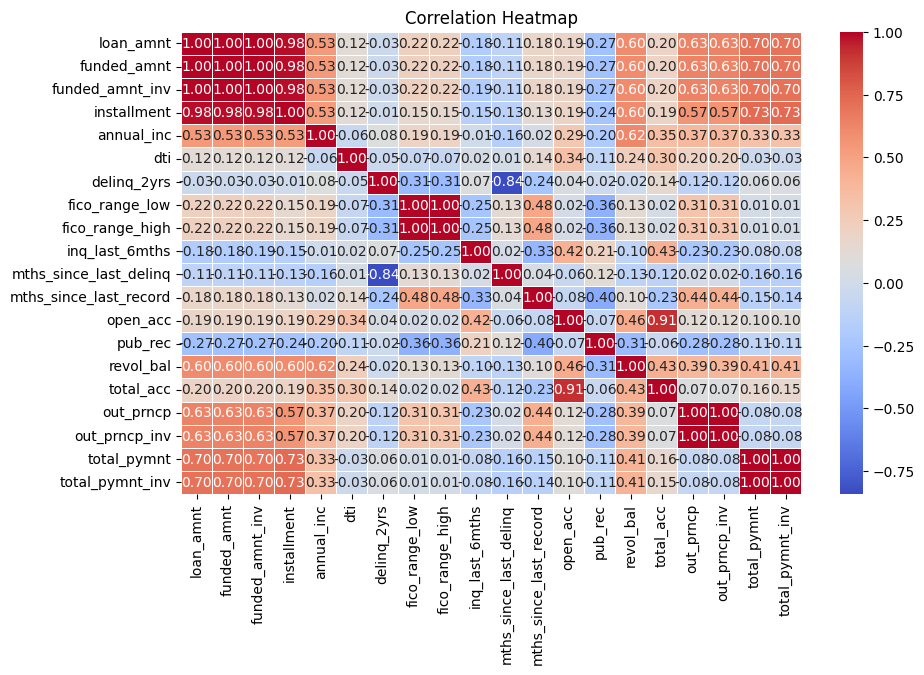

In [22]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data_corr \
            .drop(columns=data_corr.columns[20:]) \
            .corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
plt.show()

This is still too convoluted to observe in a heatmap. It can be filtered further to observe the strongest interactions (less than -0.75 and more than 0.75). A user can also split it into chunks in order to make it easier to understand. It does however show some strong correlations that could be explored further.

**Bar Chart**

Used to compare the average loan as a percentage of total balance for each job category. It allows us to immediately observe any outliers and compare differences between categories quickly.

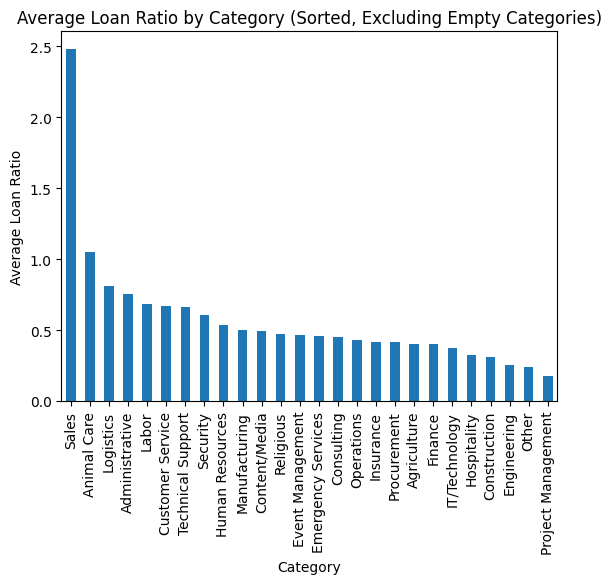

In [23]:
#Group dataset by Category and find average loan as percentage of income for each category
average_loan_ratio_by_category = data.groupby('Category')['loan_amnt_percent_of_total_balance'].mean().sort_values(ascending=False)
#Drop all infinity values as some 0 values will make plotting impossible
average_loan_ratio_by_category = average_loan_ratio_by_category[average_loan_ratio_by_category != np.inf]
average_loan_ratio_by_category
#Plot bar chart to display results
average_loan_ratio_by_category.plot(kind='bar', title='Average Loan Ratio by Category (Sorted, Excluding Empty Categories)')
plt.xlabel('Category')
plt.ylabel('Average Loan Ratio')
plt.show()

**Histogram**

As you can see on average, a person in Sales seems to have a high loan ratio in proportion to their bank balance. Let's confirm whether this is due to any outliers by utilising a histogram. This will show the skew, but can also be used to highlight the number of outliers if a logarithmic scale is used.

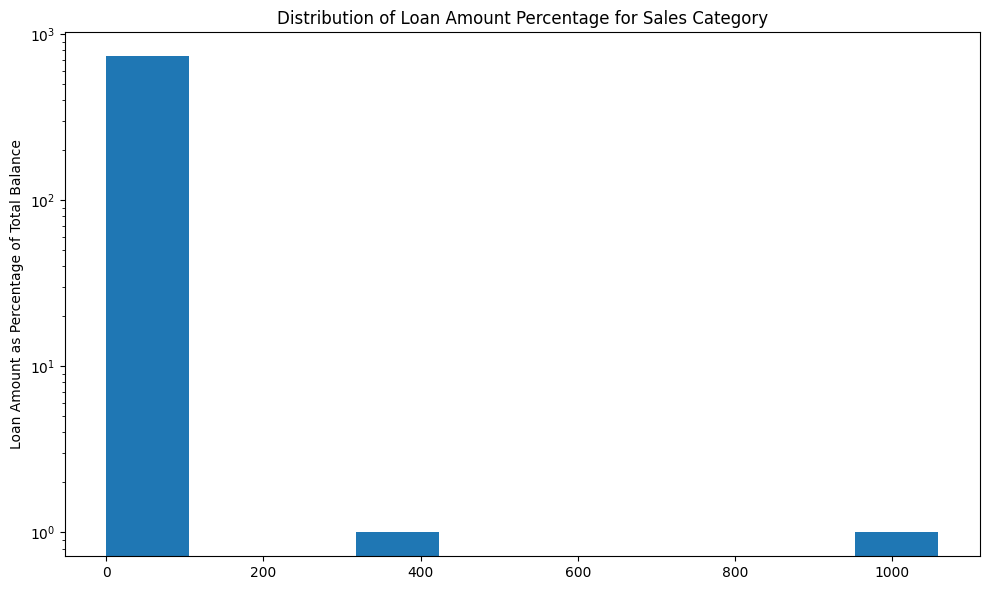

In [24]:
# Basic Hist Plot
plt.figure(figsize=(10, 6))
# Changed 'y' to 'x' to specify the data column for the plot.
plt.hist(x="loan_amnt_percent_of_total_balance", data=data[data['Category'] == 'Sales'])
plt.ylabel("Loan Amount as Percentage of Total Balance")
plt.title("Distribution of Loan Amount Percentage for Sales Category")
# Change the scale to logarithmic to reduce the degree of skew
plt.yscale('log')
plt.tight_layout()
plt.show()

As we can see, there are two values which massively skew the data. If we drop them and replot the bar chart, we can see a more accurate representation.

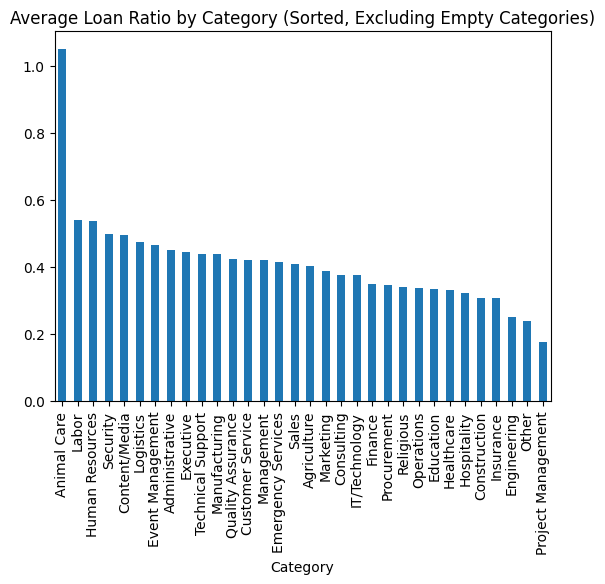

In [25]:
#Dropping extreme outliers from the dataset
data_no_outliers = data[data['loan_amnt_percent_of_total_balance'] < 1.5]
data_no_outliers.head()
data_no_outliers.groupby('Category')['loan_amnt_percent_of_total_balance'].mean().sort_values(ascending=False).plot(kind='bar', title='Average Loan Ratio by Category (Sorted, Excluding Empty Categories)')
plt.show()

In [26]:
#Pulling up some statistics for the outlier to see why this is the case
data[data['Category']=='Animal Care']['loan_amnt_percent_of_total_balance'].describe()

,loan_amnt_percent_of_total_balance
count,1.000000
mean,1.050641
std,NaN
min,1.050641
25%,1.050641
50%,1.050641
75%,1.050641
max,1.050641


After refining to exclude any extreme values (1.5x total balance), the data looked a lot tighter except for Animal Care, which occupied the second bin in the histogram further up. Once we explored the data, we saw that Animal Care occupied one row, and therefore didn't seem to be a representative dataset to include.

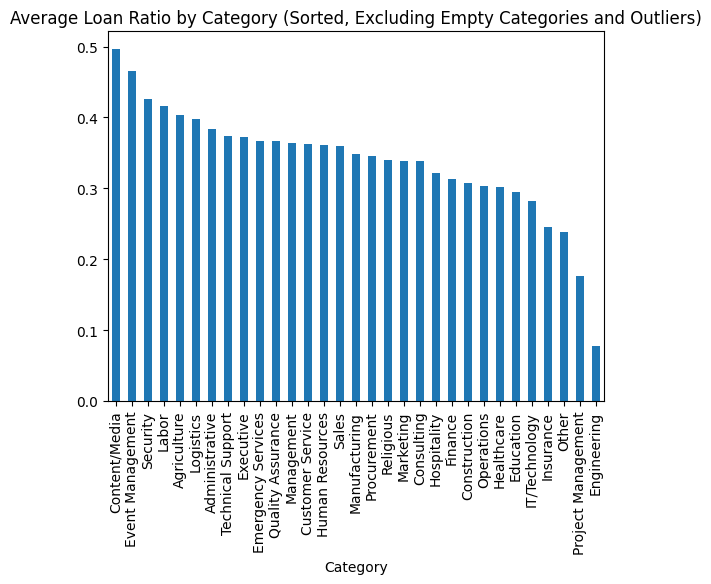

In [27]:
#Removing this outlier and replotting
data_no_outliers_final = data[data['loan_amnt_percent_of_total_balance'] < 1]
data_no_outliers_final.head()

data_no_outliers_final.groupby('Category')['loan_amnt_percent_of_total_balance'].mean().sort_values(ascending=False).plot(kind='bar', title='Average Loan Ratio by Category (Sorted, Excluding Empty Categories and Outliers)')
plt.show()

This looks a lot more accurate, where the distribution of values is a lot tighter. Here we can see that Sales has dropped towards the middle of the group, and Content/Media is now at the top of the chart. An **actionable insight** would be to either explore the outlying values further and see why they were able to take out such a large loan in proportion to their balance (this may require domain knowledge behind the loan application process).

In [28]:
#Showing data again to see what to choose for the pair plot
data.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,debt_settlement_flag_N,debt_settlement_flag_Y,last_pymnt_amnt_log,emp_title_clean,emp_title_manager,Job Title,Category,term_encoded,percent_funded,loan_amnt_percent_of_total_balance
0,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,...,1.0,0.0,4.912140,cashier,False,NaN,NaN,0,1.0,0.334784
1,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,...,1.0,0.0,6.216746,abm,False,NaN,NaN,1,1.0,0.388255
2,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,...,1.0,0.0,5.096385,driver,False,NaN,NaN,0,1.0,0.380981
3,134798709,24000.0,24000.0,24000.0,60 months,11.05%,522.42,B,B4,NaN,...,1.0,0.0,6.260384,NaN,NaN,NaN,NaN,1,1.0,1.295896
4,127097355,14000.0,14000.0,14000.0,60 months,13.59%,322.79,C,C2,Shipping Clerk,...,1.0,0.0,9.317383,shipping clerk,False,NaN,NaN,1,1.0,0.401756


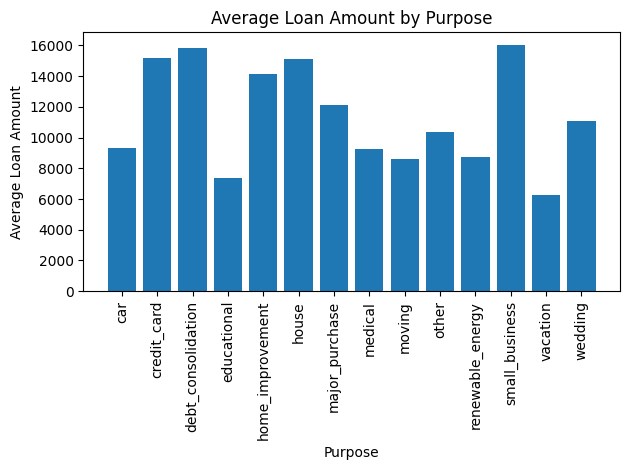

In [29]:
average_loan_by_purpose = data.groupby('purpose')['loan_amnt'].agg('mean')
average_loan_by_purpose
plt.bar(x=average_loan_by_purpose.index, height=average_loan_by_purpose.values)
plt.xticks(rotation=90)
plt.title('Average Loan Amount by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Average Loan Amount')
plt.tight_layout()
plt.show()

A relationship to explore may be to explore the incomes of those taking loans for 'luxury' purchases such as for a wedding, car or vacation.


<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

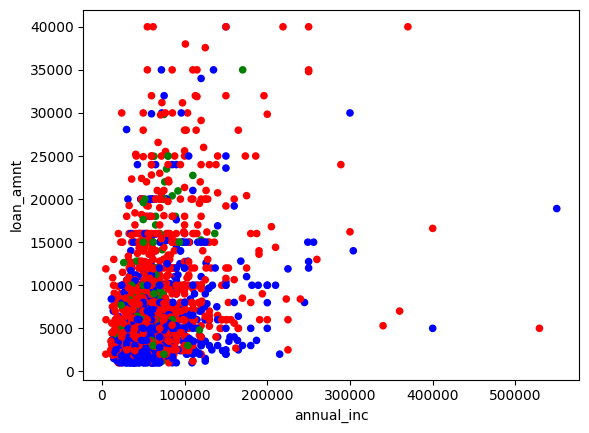

In [30]:
#Selecting rows with 'luxury' purchases
luxury_purchase = data[data['purpose'].isin(['car','vacation','wedding'])]
purpose_colours = {'car': 'red', 'vacation': 'blue', 'wedding': 'green'}
#Scatter plot of the income vs loan amount for luxury purchases
luxury_purchase.plot(x = 'annual_inc', y = 'loan_amnt', c= luxury_purchase['purpose'].map(purpose_colours), kind = 'scatter')

In [31]:
#Import statsmodel to run ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [32]:
#Running on ANOVA for annual income and purpose
model = ols('annual_inc ~ C(purpose)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                  sum_sq       df          F        PR(>F)
C(purpose)  2.250481e+12     13.0  22.944708  6.804053e-56
Residual    7.339536e+14  97279.0        NaN           NaN


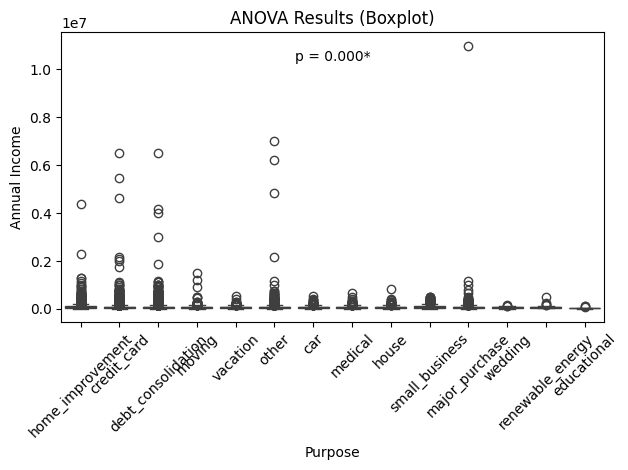

In [33]:
#Plotting boxplots for the ANOVA
means = data.groupby('purpose')['annual_inc'].mean()
stds = data.groupby('purpose')['annual_inc'].std()
# Extract p-value from ANOVA table
p_value = anova_table['PR(>F)']['C(purpose)']  # 'C(Group)' is the term name

sns.boxplot(x='purpose', y='annual_inc', data=data)
plt.title('ANOVA Results (Boxplot)')
plt.ylabel('Annual Income')
plt.xlabel('Purpose')
plt.xticks(rotation=45)
plt.tight_layout()
plt.yscale=('log')

if p_value < 0.05:
    plt.annotate(f'p = {p_value:.3f}*', xy=(0.5, 0.9), xycoords='axes fraction', ha='center')
else:
    plt.annotate(f'p = {p_value:.3f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center')

plt.show()

We can see that the ANOVA points to there being a very high likelihood that the purpose of the loan is correlated to annual income, in other words, specific loans may be sought after by people within a certain income band. However, the box plots displays some outliers who may be skewing the data to a significant degree. It makes sense to run some post-hoc tests to see if we can uncover any more information.

In [34]:
#Running a Tukey test
import statsmodels.sandbox.stats.multicomp as mc
m_comp = mc.MultiComparison(data['annual_inc'], data['purpose'])
tukey_result = m_comp.tukeyhsd()

In [35]:
#Displaying the results for the test
tukey_df = pd.DataFrame(tukey_result._results_table.data)
tukey_df.columns = tukey_df.iloc[0]
tukey_df = tukey_df.iloc[1:]
tukey_df

,group1,group2,meandiff,p-adj,lower,upper,reject
1,car,credit_card,9435.13,0.0539,-67.601,18937.861,False
2,car,debt_consolidation,7128.8114,0.3767,-2265.4905,16523.1134,False
3,car,educational,-23992.0962,0.9977,-95254.9661,47270.7738,False
4,car,home_improvement,24326.2373,0.0,14334.3423,34318.1322,True
5,car,house,12582.1931,0.1827,-2030.2774,27194.6635,False
...,...,...,...,...,...,...,...
87,renewable_energy,vacation,-9477.6043,1.0,-50661.05,31705.8414,False
88,renewable_energy,wedding,-16202.6336,0.9986,-66669.0535,34263.7862,False
89,small_business,vacation,-24101.4326,0.0,-38511.2264,-9691.6388,True
90,small_business,wedding,-30826.4619,0.0849,-63359.9137,1706.99,False


In [36]:
#Applying a boolean mask to filter the values containing luxury purchases
luxuries = ['car','wedding','vacation']
bool_mask_1 = tukey_df['group1'].isin(luxuries)
bool_mask_2 = tukey_df['group2'].isin(luxuries)
combined_mask = bool_mask_1 | bool_mask_2

In [37]:
#See which pairing was most often caused hypothesis to be rejected
luxuries_tukey = tukey_df[combined_mask]
luxuries_tukey.sort_values(by='reject')
luxuries_tukey[luxuries_tukey['reject']==True][['group1','group2']].mode()

,group1,group2
0,car,vacation


In [38]:
#What was most often accepted?
luxuries_tukey[luxuries_tukey['reject']==False][['group1','group2']].mode()

,group1,group2
0,car,wedding


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


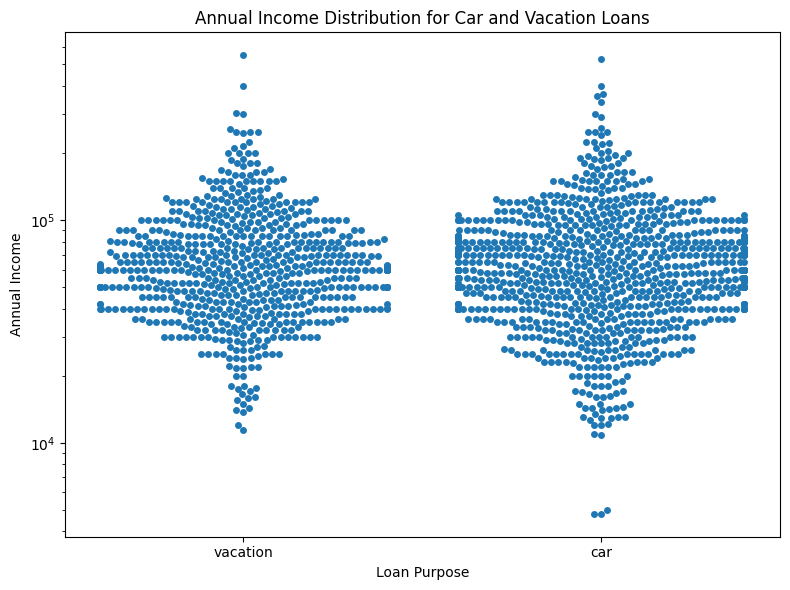

In [39]:
# Filter data for 'car' and 'vacation' purposes
car_vacation_data = data[data['purpose'].isin(['car', 'vacation'])]

# Create the box plot
plt.figure(figsize=(8, 6))
sns.swarmplot(x='purpose', y='annual_inc', data=car_vacation_data, log_scale=10)
plt.title('Annual Income Distribution for Car and Vacation Loans')
plt.xlabel('Loan Purpose')
plt.ylabel('Annual Income')
plt.tight_layout()
plt.show()

The distributions are fairly tight, although there are significant outliers that skew the data (on both extremes in the case of car loans). This may give insight to the fact that loan type doesn't have strong correlation to annual income, and may influence the likelihood to approve a loan for a larger variety of purposes in future.

In [ ]:
# export the data
data.to_csv('/content/drive/MyDrive/Data Science in Finance/python-material/Final Project/data/data_for_modelling.csv')

# Actionable Insights (Key Takeaways)



1.   There are some people who have been given loans that are significantly larger than their income, and this may be require further explanation, or highlight an issue in the loan scheme. Especially since when outliers are excluded, the range is a lot smaller.
2.   Income and purpose of loan are not correlated at all despite a surface level analysis showing that they might be, showing that it may be prudent to treat all loans with the same discernibility regardless of purpose.

